I have used the [PRML library](https://github.com/neerajkumarvaid/PRML) in the following code. Please download it and save a local copy on your computer to reproduce the results shown in this notebook.


In [1]:
# Import required libraries
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# import from prml library
import sys
sys.path.append("/Users/apple/Documents/Courses/Machine Learning Youtube 2020/Codes/")

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

# intialize a random seed for reproduce the results
np.random.seed(1234)

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    # create equally space points within the domain of the func
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x) # randomly shuffle the points
    # output is some function (func) of input points (x) + random normal noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

## Illustraion of different types of Linear Basis Functions
The following code snippet show how the shapes of different linear basis functions vary 
with different hyperparameter settings.

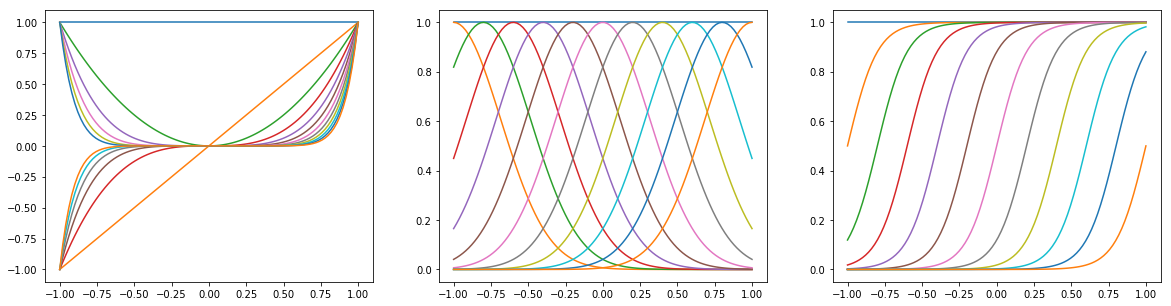

In [3]:
# create equally spaced points on x-axis
x = np.linspace(-1, 1, 100)

# polynomial function of x
X_polynomial = PolynomialFeature(11).transform(x[:, None]) # returns a 100x12 matrix

# gaussian function of x
X_gaussian = GaussianFeature(np.linspace(-1, 1, 11), 0.1).transform(x) # returns a 100x12 matrix

# sigmoidal function of x 
X_sigmoidal = SigmoidalFeature(np.linspace(-1, 1, 11), 10).transform(x) # returns a 100x12 matrix

# plot the linear basis functions for differet settings of their hyperparameters
plt.figure(figsize=(20, 5))
for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1) # create three subplots for three linear basis functions
    for j in range(12):
        plt.plot(x, X[:, j]) # in each subplot plot 12 variations of the corresponding function

## Least Squares and Maximum Likelihood Estimate

In [8]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25) # create (noisy) training data (x and y are 10x1 vectors)
x_test = np.linspace(0, 1, 100) # create equally spaced test points on x-axis (100 x 1 vector)
y_test = sinusoidal(x_test) # create test outputs

In [22]:
# Pick one of the three features below
# feature = PolynomialFeature(8)
feature = GaussianFeature(np.linspace(0,1,4),0.1) # feature transform \phi
# feature = SigmoidalFeature(np.linspace(0,1,8), 10)

# Transform (pre-processing) features into the desired space
X_train = feature.transform(x_train) # 10x9 design matrix
X_test = feature.transform(x_test) # 100x9 design matrix

In [23]:
# load and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [24]:
# predict the outputs for x_test
y, y_std = model.predict(X_test, return_std = True)

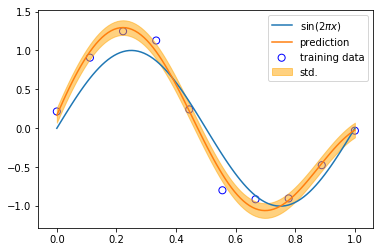

In [25]:
# create plots for visualization of the results
plt.scatter(x_train, y_train, facecolor ="none", edgecolor = "b", s=50, label = "training data")
plt.plot(x_test, y_test, label = "$\sin(2\pi x)$")
plt.plot(x_test, y, label = "prediction")
plt.fill_between(
                x_test, y-y_std, y+y_std,
                color = "orange", alpha = 0.5, label = "std.")
plt.legend()
plt.show()

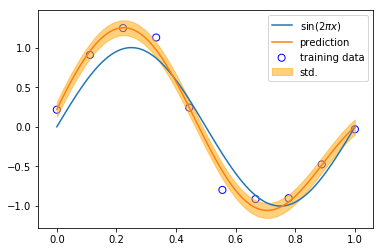

In [31]:
# Regularized Least Squares
model = RidgeRegression(alpha = 1e-3)
model.fit(X_train, y_train)

y = model.predict(X_test)

# create plots for visualization of the results
plt.scatter(x_train, y_train, facecolor ="none", edgecolor = "b", s=50, label = "training data")
plt.plot(x_test, y_test, label = "$\sin(2\pi x)$")
plt.plot(x_test, y, label = "prediction")
plt.fill_between(
                x_test, y-y_std, y+y_std,
                color = "orange", alpha = 0.5, label = "std.")
plt.legend()
plt.show()